# MEMBUAT DUPLIKASI CODE BM25

## TUGAS MATA KULIAH TEMU KEMBALI INFORMASI
- Melakukan uji coba code BM25 menggunakan python
- Memahami cara kerja BM25
- Memahami tahapan dan proses kerja BM25
- Memahami berbagai library pendukung implementasi BM25

1. Query yang saya gunakan: [Python BM25 Repositories](https://github.com/search?l=Python&q=BM25&type=Repositories&s=stars&o=desc)
2. Saya menggunakan Repository dari: [SylphAI-Inc AdalFlow](https://github.com/SylphAI-Inc/AdalFlow)
3. Disini saya test `BM25Retriever` dan mencoba run demo sederhana
4. Proses yang akan dilakukan antara lain:
    - Modifikasi Dataset
    - Preprocessing
    - Penyiapan Data
    - Penggunaan BM25
    - Keluaran Hasil
5. Hasil akhir di simpan di `BM25_230411100197.pdf` dan github saya [ACHMAD RIDHO FA'IZ](https://github.com/rhindottire)

## AdalFlow formula

$$
\mathrm{idf}(q_i)
\;=\;\log\!\Bigl(\tfrac{N - n(q_i) + 0.5}{n(q_i) + 0.5}\Bigr)
$$

$$
\mathrm{score}(Q, D)
\;=\;\sum_{i=1}^{n}
   \mathrm{idf}(q_i)
   \;\times\;
   \frac{f(q_i, D)\,(k_1 + 1)}
        {f(q_i, D)
         \;+\;k_1\Bigl(1 - b + b\,\tfrac{|D|}{\mathrm{avgdl}}\Bigr)}
$$

Source: [adalflow documentation](https://adalflow.sylph.ai/apis/components/components.retriever.bm25_retriever.html#module-components.retriever.bm25_retriever)

- $N$              : Jumlah total dokumen dalam korpus
- $n(q_i)$         : Jumlah dokumen yang memuat term $q_i$
- $f(q_i,D)$       : Frekuensi kemunculan term $q_i$ dalam dokumen $D$
- $|D|$            : Panjang dokumen $D$ dalam jumlah kata/token
- $\mathrm{avgdl}$ : Rata‑rata panjang dokumen di seluruh korpus
- $k_1$            : Parameter pengaturan *term frequency saturation* (biasanya $1.2 \le k_1 \le 2.0$)
- $b$              : Parameter normalisasi panjang dokumen (biasanya $0.5 \le b \le 0.8$)
- $\mathrm{top\_k}$: (argumen `top_k`) Jumlah dokumen teratas yang akan dikembalikan
- $\varepsilon$    : (argumen `epsilon`) Untuk *lower‑bounding* negatif IDF, default 0.25


## Smoke Test Import
```python
from adalflow.components.retriever import BM25Retriever
print(BM25Retriever)

# Output should be:
<class 'adalflow.components.retriever.bm25_retriever.BM25Retriever'>
```

## BM25 Demo with Simple Documents

```python
from adalflow.components.retriever.bm25_retriever import BM25Retriever

docs = [
  {"content": "Machine learning and data mining techniques"},
  {"content": "Natural language processing with BM25 ranking"},
  {"content": "AdalFlow makes building retrieval pipelines easy"},
  {"content": "Local Outlier Factor for anomaly detection in data"}
]

bm25 = BM25Retriever(
  top_k=4,
  documents=docs,
  document_map_func=lambda d: d["content"],
)

query   = "data mining BM25"
outputs = bm25(input=query)

print("Query:", outputs)

result = outputs[0]
for idx, score in zip(result.doc_indices, result.doc_scores):
  print(f"  - Doc #{idx}: {docs[idx]['content']} (score: {score:.4f})")

# Output should be:
Query: [RetrieverOutput(id=None, doc_indices=[0, 1, 2, 3], doc_scores=[0.8776790585684181, 0.8776790585684181, 0.0, 0.0], query='data mining BM25', documents=None)]
  - Doc #0: Machine learning and data mining techniques (score: 0.8777)
  - Doc #1: Natural language processing with BM25 ranking (score: 0.8777)
  - Doc #2: AdalFlow makes building retrieval pipelines easy (score: 0.0000)
  - Doc #3: Local Outlier Factor for anomaly detection in data (score: 0.0000)
```

## Review
Dokumen yang **tidak** memuat **istilah query** apa pun akan mendapatkan skor nol.
Contoh dua dokumen pertama (`doc0` dan `doc1`) berisi istilah “data”, “mining”, atau “BM25”, sehingga mendapat skor ≈ 0.8777, sedangkan dokumen ketiga dan keempat tidak mengandung **semua** istilah query secara bersamaan sehingga skor mereka nol.

Implementasi `BM25Retriever` dari AdalFlow mengikuti rumus `Okapi BM25` sebagaimana dijelaskan di literatur IR dan digunakan oleh sistem seperti **Elasticsearch** dan **Lucene** ([Wikipedia][1])

[1]: https://en.wikipedia.org/wiki/Okapi_BM25 "Okapi BM25"

## Why Are There Documents with a Zero Score?
### 1. No Overlap Terms
BM25 menghitung skor setiap dokumen **hanya** berdasarkan istilah yang **bersilangan** antara query dan dokumen. Jika sebuah dokumen **tidak** memuat **istilah query** mana pun, maka jumlah penjumlahan dalam formula BM25 menjadi nol:

$$ \text{score}(D,Q) \;=\; \sum_{q_i\in Q} \ldots = 0 $$

### 2. Case in Example
- **Doc #2** (“AdalFlow makes building retrieval pipelines easy”) tidak memuat “data”, “mining”, maupun “BM25” → skor 0.0000.
- **Doc #3** (“Local Outlier Factor for anomaly detection in data”) hanya memuat “data” satu kali. Namun dalam implementasi default AdalFlow, **stop‑word removal** dan **normalisasi** (jika diaktifkan) dapat menghilangkan istilah umum seperti “data” jika dianggap tidak bermakna, sehingga berpotensi meniadakan kontribusi skor


## Assignment
### Extend & Experiment with Documents + Queries

1. _import_ `os`
Modul os menyediakan antarmuka portable untuk berbagai fungsi bergantung pada sistem operasi.
    - Membaca/membuat/menghapus file dan direktori
    - Mengambil atau mengubah variabel lingkungan (`os.environ`)
    - Menjalankan perintah sistem (`os.system`)
    - Manipulasi path dengan `os.path` (join, split, normpath)
2. _import_ `pandas` _as_ `pd`
Pandas adalah libary Python untuk analisis data tabular, dengan struktur utama:
    - DataFrame: tabel dua dimensi (baris & kolom)
    - Series: satu kolom data dengan konvensi luas untuk mempersingkat pemanggilan fungsi/fitur Pandas
1. _from_ `IPython.display` _import_ `display`
Tersedia di lingkungan IPython/Jupyter Notebook, berfungsi untuk:
    - Menampilkan output objek dengan rendering “rich” (tabel, gambar, HTML, LaTeX, dsb.)
    - Otomatis memilih representasi terbaik berdasarkan tipe objek (DataFrame jadi tabel interaktif)

Source Data: [20 Newsgroups](https://www.kaggle.com/datasets/crawford/20-newsgroups?resource=download)

In [6]:
import os
import pandas as pd
from IPython.display import display

data_path = 'data/20_newsgroups'
entries_raw = sorted(os.listdir(data_path))

entries = []
for entry in entries_raw:
    full_path = os.path.join(data_path, entry)
    entry_type = "Folder" if os.path.isdir(full_path) else "File"
    entries.append((entry, entry_type))

df = pd.DataFrame(entries, columns=["Name", "Type"])

styled_df = df.style.set_properties(**{'text-align': 'left'})
styled_df.set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')]
}])

display(styled_df)

,Name,Type
0,alt.atheism.txt,File
1,comp.graphics.txt,File
2,comp.os.ms-windows.misc.txt,File
3,comp.sys.ibm.pc.hardware.txt,File
4,comp.sys.mac.hardware.txt,File
5,comp.windows.x.txt,File
6,list.csv,File
7,misc.forsale.txt,File
8,rec.autos.txt,File
9,rec.motorcycles.txt,File


### Get and Load Documents

In [7]:
def load_documents(base_path):
    documents = []
    for filename in os.listdir(base_path):
        if filename.endswith('.txt'):
            category = filename.replace('.txt', '')
            file_path = os.path.join(base_path, filename)
            with open(file_path, 'r', encoding='latin1') as file:
                content = file.read()
                docs = [doc.strip() for doc in content.split('\n\n\n') if doc.strip()]
                for doc in docs:
                    documents.append({'content': doc, 'category': category})
    return documents

base_path = 'data/20_newsgroups'
documents_raw = load_documents(base_path)
print(f"Loaded {len(documents_raw)} raw documents.")

Loaded 31255 raw documents.


### Text Preprocessing
1. _import_ `re`
Mengkompilasi dan menjalankan ekspresi reguler **(regex)** untuk mencari, mencocokkan, dan memanipulasi pola teks.
    - Pencocokan pola: `re.search()`, `re.match()`, `re.fullmatch()`
    - Ekstraksi semua kecocokan: `re.findall()`
    - Pembagian teks berdasarkan pola: `re.split()`
    - Penggantian subteks: `re.sub()`
    - Kompilasi pola: `re.compile()` untuk performa dan penggunaan ulang yang lebih baik

2. _import_ `nltk`
Natural Language Toolkit adalah program Python yang bekerja dengan data bahasa manusia.
    - Menyediakan antarmuka mudah ke >50 corpus dan sumber daya leksikal (WordNet)
    - Menyertakan alat pemrosesan teks untuk `klasifikasi`, `tokenisasi`, `stemming`, tagging, `parsing`, dan reasoning
    - Melibatkan wrapper untuk pustaka NLP industri dan komunitas diskusi aktif

3. _from_ `nltk.corpus` _import_ `stopwords`
    - Memuat daftar ("stop words") seperti “the”, “is”, “and” yang sering diabaikan karena sedikit kontribusi makna.
    - Daftar tersedia untuk 16 bahasa (termasuk Inggris, Indonesia, dll.)
    - Sebelum memanggil `stopwords.words()`, perlu menjalankan `nltk.download('stopwords')`.

4. _from_ `nltk.stem` _import_ `PorterStemmer`
    - PorterStemmer menerapkan algoritma stemming `Porter` untuk menyederhanakan kata ke bentuk dasar (stem):
    - Mereduksi “running” → “run”, “caresses” → “caress”
    - Menghilangkan akhiran morfologis sehingga variasi kata dapat digolongkan bersama
    - Terdapat tiga mode: ORIGINAL_ALGORITHM, MARTIN_EXTENSIONS, dan NLTK_EXTENSIONS (default).

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [ps.stem(word) for word in words]
    return ' '.join(words)

documents = []
for d in documents_raw:
    processed = preprocess_text(d['content'])
    documents.append({'content': processed, 'category': d['category']})
print(f"Processed into {len(documents)} cleaned documents.")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processed into 31255 cleaned documents.


### Build an Inverted 
1. _from_ `collections` _import_ `defaultdict`
Subclass dari dict yang memungkinkan menetapkan nilai default untuk kunci yang belum ada.
Ini sangat berguna untuk menghindari pengecekan manual apakah sebuah kunci sudah ada sebelum menambahkan atau memodifikasi nilainya. Fungsi utama:
    - Otomatis menginisialisasi nilai default: Jika Anda mengakses kunci yang belum ada, defaultdict akan otomatis membuat entri baru dengan nilai default yang ditentukan.
    - Menghindari KeyError: Tidak perlu lagi menulis logika tambahan untuk menangani kunci yang hilang.

2. _import_ `json`
adalah bagian dari libary standar Python yang digunakan untuk bekerja dengan data dalam format JSON.
JavaScript Object Notation (JSON) adalah format teks ringan untuk pertukaran data yang mudah dibaca dan ditulis oleh manusia serta mudah diurai dan dihasilkan oleh mesin. Fungsi utama:
    - `json.dumps()`: Mengubah objek Python menjadi string JSON.
    - `json.loads()`: Mengubah string JSON menjadi objek Python.
    - `json.dump()`: Menulis objek Python sebagai JSON ke dalam file.
    - `json.load()`: Membaca JSON dari file dan mengubahnya menjadi objek Python.

In [9]:
from collections import defaultdict
import json

inverted_index = defaultdict(set)
for doc_id, doc in enumerate(documents):
    for term in set(doc['content'].split()):
        inverted_index[term].add(doc_id)

inverted_index_serializable = {term: list(ids) for term, ids in inverted_index.items()}
with open('inverted_index.json', 'w', encoding='utf-8') as f:
    json.dump(inverted_index_serializable, f, ensure_ascii=False, indent=2)

# Inspect first 10 terms
print("Top 10 terms in inverted index:")
for i, (term, ids) in enumerate(inverted_index_serializable.items()):
    if i >= 10: break
    print(f"{term}: {ids}")

Top 10 terms in inverted index:
new: [0, 1, 3, 8, 12, 13, 15, 26, 34, 42, 52, 56, 59, 60, 62, 69, 81, 82, 85, 86, 96, 102, 103, 107, 109, 110, 116, 117, 124, 128, 136, 137, 143, 146, 148, 153, 179, 195, 203, 205, 212, 214, 223, 226, 232, 271, 272, 275, 290, 292, 296, 301, 302, 308, 311, 314, 316, 323, 326, 327, 345, 351, 360, 369, 370, 374, 398, 436, 441, 443, 447, 454, 460, 461, 462, 467, 469, 474, 478, 488, 511, 521, 529, 530, 532, 537, 541, 542, 544, 555, 563, 571, 581, 585, 588, 589, 591, 598, 610, 611, 614, 615, 625, 631, 632, 636, 638, 639, 645, 646, 653, 657, 665, 666, 672, 675, 677, 682, 708, 724, 732, 734, 741, 743, 752, 755, 761, 800, 801, 804, 819, 821, 825, 830, 831, 837, 840, 843, 845, 852, 855, 856, 874, 880, 889, 898, 899, 903, 927, 965, 970, 972, 976, 983, 989, 990, 991, 996, 998, 1003, 1007, 1017, 1040, 1050, 1058, 1059, 1061, 1066, 1070, 1071, 1073, 1084, 1092, 1100, 1110, 1114, 1117, 1118, 1120, 1127, 1139, 1140, 1143, 1144, 1154, 1160, 1161, 1165, 1167, 1168, 1174, 

## Parameter Tuning BM25

In [10]:
from adalflow.components.retriever.bm25_retriever import BM25Retriever

query = "machine learning algorithms"
query_processed = preprocess_text(query)

param_grid = [(1.2, 0.75), (2.0, 0.75), (1.5, 0.5), (1.5, 1.0), (2.0, 1.0)]
results_summary = []

for k1, b in param_grid:
    bm25 = BM25Retriever(top_k=5, k1=k1, b=b)
    bm25.build_index_from_documents(documents, document_map_func=lambda d: d['content'])
    outputs = bm25(input=query_processed)[0]

    results_summary.append({
        'k1': k1,
        'b': b,
        'scores': outputs.doc_scores
    })

    print(f"\n=== BM25 Results (k1={k1}, b={b}) ===")
    for idx, score in zip(outputs.doc_indices, outputs.doc_scores):
        content_snippet = documents[idx]['content'][:100].replace('\n', ' ')
        print(f"Document #{idx} (Score: {score:.4f})")


=== BM25 Results (k1=1.2, b=0.75) ===
Document #18630 (Score: 10.4878)
Document #19398 (Score: 10.4878)
Document #1989 (Score: 9.9995)
Document #2487 (Score: 9.8140)
Document #3532 (Score: 9.8140)

=== BM25 Results (k1=2.0, b=0.75) ===
Document #1609 (Score: 11.4662)
Document #2107 (Score: 11.3456)
Document #3152 (Score: 11.3456)
Document #1989 (Score: 11.3127)
Document #18630 (Score: 11.3046)

=== BM25 Results (k1=1.5, b=0.5) ===
Document #18630 (Score: 11.7365)
Document #19398 (Score: 11.7365)
Document #21259 (Score: 11.3848)
Document #22023 (Score: 11.3848)
Document #1609 (Score: 10.8474)


d:\GitHub\lecture-projects\Information-Retrieval\AdalFlow\.venv\Lib\site-packages\adalflow\components\retriever\bm25_retriever.py:264: RuntimeWarning: invalid value encountered in divide
  q_freq



=== BM25 Results (k1=1.5, b=1.0) ===
Document #1989 (Score: 11.8456)
Document #2635 (Score: 11.8040)
Document #3680 (Score: 11.8040)
Document #2487 (Score: 11.4674)
Document #3532 (Score: 11.4674)

=== BM25 Results (k1=2.0, b=1.0) ===
Document #1989 (Score: 12.9944)
Document #2635 (Score: 12.8714)
Document #3680 (Score: 12.8714)
Document #2487 (Score: 12.4971)
Document #3532 (Score: 12.4971)


## Visualization of Score Distribution

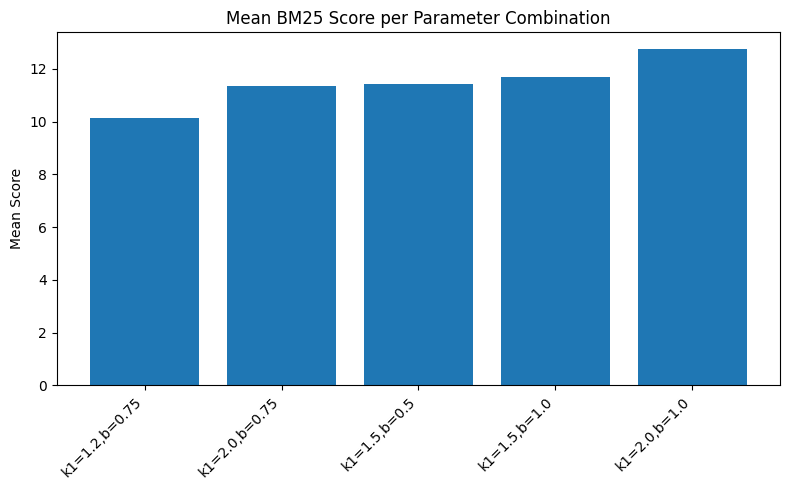

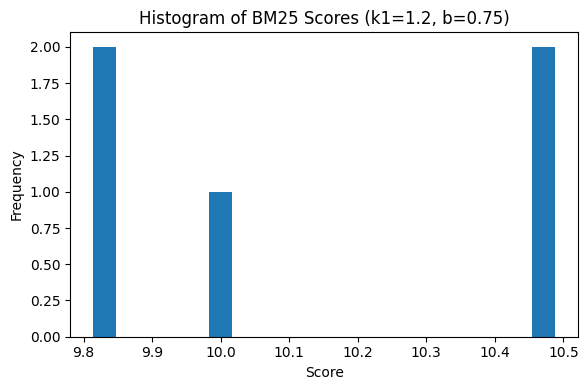

In [11]:
import matplotlib.pyplot as plt

data_labels = [f"k1={r['k1']},b={r['b']}" for r in results_summary]
mean_scores = [sum(r['scores'])/len(r['scores']) for r in results_summary]

# Bar chart of mean scores per parameter combination
plt.figure(figsize=(8,5))
plt.bar(data_labels, mean_scores)
plt.xticks(rotation=45, ha='right')
plt.title('Mean BM25 Score per Parameter Combination')
plt.ylabel('Mean Score')
plt.tight_layout()
plt.show()

# Histogram for the first parameter combination
first = results_summary[0]
plt.figure(figsize=(6,4))
plt.hist(first['scores'], bins=20)
plt.title(f"Histogram of BM25 Scores (k1={first['k1']}, b={first['b']})")
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()